### Prep Work

In [1]:
# Import general libraries
import pandas as pd
import numpy as np

import datetime
import warnings; warnings.simplefilter('ignore')

np.random.seed(42)

In [2]:
# Import Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

import collections, numpy

In [3]:
# Import Keras libraries
import keras as ks
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten 
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils, to_categorical
from keras import regularizers

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


In [4]:
# Import Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
# Increase size of dataframe
pd.set_option('display.max_columns', 50000)
pd.set_option('display.max_rows', 100000)
pd.options.display.max_colwidth = 500

### Read Vectorized data 

In [6]:
data = pd.read_csv('../data/vectorized_data_tvec.csv', index_col=0)

### Perform Train-Test split

In [7]:
y = data['ata4_code']

X = data.drop(columns='ata4_code')

In [8]:
# One hot code target and can only run it once
y = to_categorical(y) 

In [9]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Keras Feed Forward Neural Network

In [10]:
data['ata4_code'].shape

(10062,)

In [11]:
X_train.shape

(7546, 10031)

In [12]:
# Create a neural network
model = Sequential()

# Input layer
model.add(Dense(4096,
               activation='relu',
               input_shape=(X_train.shape[1],),
            kernel_regularizer=regularizers.l2(0.01)))

# Add 1st dense layer
model.add(Dense(8192, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Add 2nd dense layer
model.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Add output layer
model.add(Dense(y.shape[1], # one neuron per class - so 10 neurons
               activation='softmax')) # always use softmax for multi class

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
# compile the model
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [14]:
# fit the model
history = model.fit(X_train, y_train,
          epochs=16, 
          batch_size=1024, 
          validation_data=(X_test, y_test),
          verbose=1) 

Instructions for updating:
Use tf.cast instead.
Train on 7546 samples, validate on 2516 samples
Epoch 1/16
7546/7546 [==============================] - 74s 10ms/step - loss: 119.7274 - acc: 0.7352 - val_loss: 58.8210 - val_acc: 0.8434
Epoch 2/16
7546/7546 [==============================] - 46s 6ms/step - loss: 43.2661 - acc: 0.5318 - val_loss: 19.5271 - val_acc: 0.8434
Epoch 3/16
7546/7546 [==============================] - 48s 6ms/step - loss: 14.8983 - acc: 0.8525 - val_loss: 11.1037 - val_acc: 0.8434
Epoch 4/16
7546/7546 [==============================] - 46s 6ms/step - loss: 9.7601 - acc: 0.8524 - val_loss: 8.6302 - val_acc: 0.8434
Epoch 5/16
7546/7546 [==============================] - 47s 6ms/step - loss: 8.1241 - acc: 0.7430 - val_loss: 6.3301 - val_acc: 0.8434
Epoch 6/16
7546/7546 [==============================] - 43s 6ms/step - loss: 5.5474 - acc: 0.7477 - val_loss: 4.9595 - val_acc: 0.8434
Epoch 7/16
7546/7546 [==============================] - 51s 7ms/step - loss: 4.5027 - 

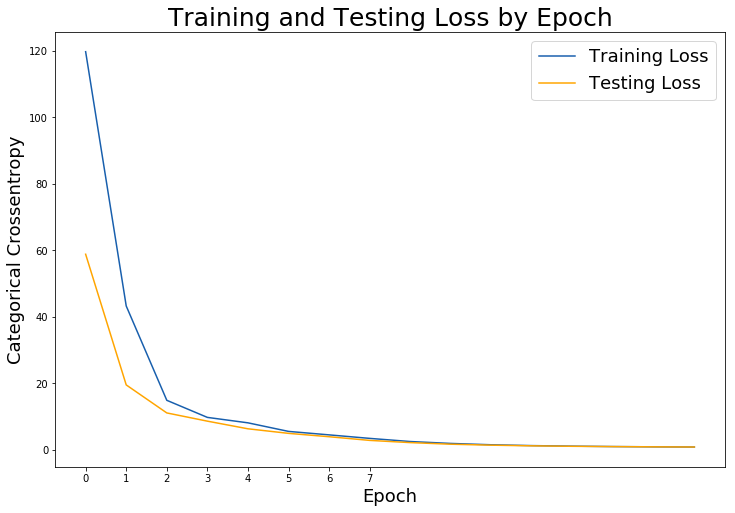

In [15]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7])

plt.legend(fontsize = 18);

In [16]:
# Evaluate model on test data.
ffnn_score = model.evaluate(X_test,
                       y_test,
                       verbose=1)

ffnn_labels = model.metrics_names

2516/2516 [==============================] - 23s 9ms/step


In [17]:
# Look at model performance
print(f'FFNN {ffnn_labels[0]}  : {ffnn_score[0]}')
print(f'FFNN {ffnn_labels[1]}  : {ffnn_score[1]}')
print()

model.summary()

FFNN loss  : 0.8537421988379595
FFNN acc  : 0.8434022257551669

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4096)              41091072  
_________________________________________________________________
dense_2 (Dense)              (None, 8192)              33562624  
_________________________________________________________________
dense_3 (Dense)              (None, 4096)              33558528  
_________________________________________________________________
dense_4 (Dense)              (None, 2571)              10533387  
Total params: 118,745,611
Trainable params: 118,745,611
Non-trainable params: 0
_________________________________________________________________
